In [76]:
# FILE READING
import pandas as pd
import re
from tqdm.notebook import tqdm, trange

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'
TweetData = pd.read_csv("Tweet.csv")
CompanyData = pd.read_csv("Company.csv")
Company_TweetData = pd.read_csv("Company_Tweet.csv")
CompanyValuesData = pd.read_csv("CompanyValues.csv")

In [2]:
print(TweetData.shape,CompanyData.shape,Company_TweetData.shape,CompanyValuesData.shape)

(3717964, 7) (6, 2) (4336445, 2) (17528, 7)


In [10]:
display(TweetData.head())
display(Company_TweetData.head())
display(CompanyValuesData.head())

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL


,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,price_movement
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.47,1
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.63,1
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.09,0
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.50,0
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.35,1


In [11]:
# SEPERATING PRICES INTO OPEN AND CLOSE TO CHECK ON WHICH DAYS WAS PRICE HIGHER THAN PREVIOUS DAY
list_of_open_prices = CompanyValuesData['open_value']
list_of_close_prices = CompanyValuesData['close_value']

In [12]:
# CREATED A LABEL FOR THE DATASET BASED ON PRICE MOVEMENT
# IF THE PRICE MOVES UP DURING THE DAY = POSITIVE -> 1
# IF THE PRICE MOVES DOWN DURING THE DAY = NEGATIVE -> 0
price_movement = []
price_movement.append(1)
for i in range(1,len(list_of_close_prices)):
    if(list_of_close_prices[i-1] < list_of_close_prices[i]):
        price_movement.append(1)
    else:
        price_movement.append(0)
price_movement_df = pd.DataFrame(price_movement, columns = ['price_movement'])

In [13]:
# ADDING THE LABEL COLUMN TO THE DATASET
CompanyValuesData["price_movement"] = price_movement_df

Counter({'AAPL': 1425013, 'TSLA': 1096868, 'AMZN': 718715, 'GOOG': 392569, 'MSFT': 375711, 'GOOGL': 327569})


<AxesSubplot:>

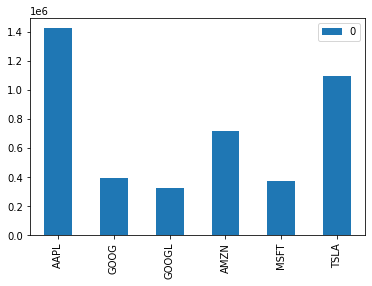

In [14]:
from collections import Counter
companyTweets = Company_TweetData['ticker_symbol']
companyNumberOfMentions = Counter(companyTweets)
print(companyNumberOfMentions)
df = pd.DataFrame.from_dict(companyNumberOfMentions, orient='index')
df.plot(kind='bar')

In [41]:
# JOINING THE TWEET_DATA AND COMPANY_TWEET_DATA TO COMBINE THEM INTO A DATASET OF TWEETS
MASTER_DATA_SET_OF_TWEETS = pd.merge(TweetData, Company_TweetData, on="tweet_id")

In [42]:
# REMOVING TWEET_ID SINCE IT WOULD HAVE NO IMPACT ON STOCK MOVEMENT
MASTER_DATA_SET_OF_TWEETS = MASTER_DATA_SET_OF_TWEETS.drop(axis = 1, columns = ['tweet_id','writer'])
MASTER_DATA_SET_OF_TWEETS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336445 entries, 0 to 4336444
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   post_date      int64 
 1   body           object
 2   comment_num    int64 
 3   retweet_num    int64 
 4   like_num       int64 
 5   ticker_symbol  object
dtypes: int64(4), object(2)
memory usage: 231.6+ MB


In [43]:
set_of_all_timestamps = MASTER_DATA_SET_OF_TWEETS['post_date']

# CONVERTING ALL TIMESTAMPS INTO DATES - SINCE IT'LL BE NEEDED FOR JOINING WITH COMPANY PRICE DATA
from datetime import datetime
day_date = []
for i in set_of_all_timestamps:
    dateFormatted = datetime.fromtimestamp(i).isoformat()
    dateSliced = dateFormatted[:10]
    day_date.append(dateSliced)
    
# REPLACING TIMESTAMPS WITH DATES    
MASTER_DATA_SET_OF_TWEETS['day_date'] = day_date
MASTER_DATA_SET_OF_TWEETS = MASTER_DATA_SET_OF_TWEETS.drop(axis = 1, columns = ['post_date'])

In [44]:
MASTER_DATA_SET_OF_TWEETS.head()

,body,comment_num,retweet_num,like_num,ticker_symbol,day_date
0,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01
1,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01
2,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,2015-01-01
3,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,2015-01-01
4,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01


In [45]:
CompanyValuesData.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,price_movement
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.47,1
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.63,1
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.09,0
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.50,0
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.35,1


In [46]:
# SINCE COMPANY PRICE DATA WAS FOR PAST 10 YEARS (FROM 2010-2020) BUT WE ONLY NEED IT FOR 2015-2020
# THEREFORE, DATASET NEEDED TO BE CLEANED

recentCompanyValuesData = []
count=0

for ind in CompanyValuesData.index:
    day_date = CompanyValuesData['day_date'][ind]
    if(int(day_date[:4])>=2015):
        recentCompanyValuesData.append(CompanyValuesData.iloc[ind])
    else:
        count+=1

updatedRecentCompanyValuesData = pd.DataFrame(recentCompanyValuesData) 

In [53]:
# COMBINING DIFFERENT TABLES INTO A SINGLE DATASET
MASTER_DATA_SET = pd.merge(MASTER_DATA_SET_OF_TWEETS,updatedRecentCompanyValuesData,on=['day_date','ticker_symbol'])
MASTER_DATA_SET.head()

,body,comment_num,retweet_num,like_num,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,price_movement
0,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21,1
1,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21,1
2,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21,1
3,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21,1
4,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21,1


In [54]:
# SEPERATING THE LABEL FROM THE MASTER DATASET
Label = MASTER_DATA_SET.pop('price_movement')

In [55]:
# FUTHER REFINING THE DATASET - COALESCING 2 COLUMNS INTO ONE AND REMOVING THE OTHERS NOT REQUIRED ONES
MASTER_DATA_SET['max_diff'] = MASTER_DATA_SET['high_value'] - MASTER_DATA_SET['low_value']
MASTER_DATA_SET = MASTER_DATA_SET.drop(axis = 1, columns = ['low_value','high_value','ticker_symbol'])

In [56]:
MASTER_DATA_SET.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4335724 entries, 0 to 4335723
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   body         object 
 1   comment_num  int64  
 2   retweet_num  int64  
 3   like_num     int64  
 4   day_date     object 
 5   close_value  float64
 6   volume       int64  
 7   open_value   float64
 8   max_diff     float64
dtypes: float64(3), int64(4), object(2)
memory usage: 330.8+ MB


### Running FINBERT classifier

In [62]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

## Downloads pretrained finBERT model

tokenizer = AutoTokenizer.from_pretrained("ipuneetrathore/bert-base-cased-finetuned-finBERT")
model = AutoModelForSequenceClassification.from_pretrained("ipuneetrathore/bert-base-cased-finetuned-finBERT")

Downloading:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/433M [00:00<?, ?B/s]

In [99]:
text1 = 'Insanity of today weirdo massive selling...!'

inputs = tokenizer(text1,return_tensors = 'pt')
output = model(**inputs)
sentiments = list(output[0].data[0])
print(sentiments[0].numpy() - sentiments[1].numpy())

-10.322577


In [101]:
polarity_list = []
MASTER_DATA_SET_TRUNCATED = MASTER_DATA_SET.sample(n = 100000, random_state = 1)
LABEL = Label.sample(n = 100000, random_state = 1)
for i in tqdm(MASTER_DATA_SET_TRUNCATED.iterrows()):
    tweet = i[1]['body'].lower()
    tweet = re.sub(r'http\S+', '', tweet)
    
    inputs = tokenizer(tweet, return_tensors = 'pt')
    output = model(**inputs)
    sentiments = list(output[0].data[0])
    polarity_list.append(sentiments[0].numpy() - sentiments[1].numpy())

0it [00:00, ?it/s]

In [102]:
polarity_df = pd.DataFrame(polarity_list, columns = ['polarity'])
polarity_df.to_csv('FinBERTModelOutput.csv')
polarity_df.describe()

,polarity
count,100000.000000
mean,-9.885086
std,5.428294
min,-13.386950
25%,-12.259912
50%,-12.050096
75%,-11.413995
max,11.753155


#### TEXT Analysis Complete

In [106]:
import sklearn.model_selection as model_selection

polarity_df = polarity_df.set_index(MASTER_DATA_SET_TRUNCATED.index)                      
MASTER_DATA_SET_TRUNCATED['polarity'] = polarity_df['polarity']

# SPLITTING INTO TRAIN AND TEST DATA
X_train, X_test, y_train, y_test = model_selection.train_test_split(MASTER_DATA_SET_TRUNCATED, LABEL, train_size=0.65, random_state=69)

X_train = X_train.drop(axis = 1, columns = ['body','day_date','volume','close_value','open_value'])
X_test = X_test.drop(axis = 1, columns = ['body','day_date','volume','close_value','open_value'])
display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,comment_num,retweet_num,like_num,max_diff,polarity
2017712,0,0,1,0.44,-11.517852
1298272,0,0,0,10.94,-11.518186
1386907,0,0,0,8.47,-3.513427
2805768,0,0,1,6.46,5.195347
701932,0,4,2,0.79,-11.675406


,comment_num,retweet_num,like_num,max_diff,polarity
864624,1,0,1,4.7400,-12.061741
1173262,0,0,0,1.1100,2.654107
4073081,0,0,1,9.2550,-12.103197
3781875,0,1,0,19.1877,-12.226639
173885,0,2,0,6.3100,-12.197323


2017712    1
1298272    0
1386907    1
2805768    0
701932     1
Name: price_movement, dtype: int64

864624     1
1173262    1
4073081    0
3781875    0
173885     1
Name: price_movement, dtype: int64

In [108]:
lr_x_train = X_train
lr_y_train = y_train
lr_x_test = X_test
lr_y_test = y_test

tree_x_train = X_train
tree_y_train = y_train
tree_x_test = X_test
tree_y_test = y_test

svm_x_train = X_train
svm_y_train = y_train
svm_x_test = X_test
svm_y_test = y_test

In [109]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs', max_iter=100000)

# fit the model with data
logreg.fit(lr_x_train,lr_y_train)

#
y_pred=logreg.predict(lr_x_test)

In [111]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(lr_y_test, y_pred))

[[19254    25]
 [15683    38]]
Accuracy: 0.5512


In [112]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(tree_x_train,tree_y_train)

#Predict the response for test dataset
y_pred = clf.predict(tree_x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(tree_y_test, y_pred))

Accuracy: 0.7050285714285714


In [113]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(svm_x_train.head(100),svm_y_train.head(100))

#Predict the response for test dataset
y_pred = clf.predict(svm_x_test.head(100))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(svm_y_test.head(100), y_pred))

Accuracy: 0.62


In [117]:
MASTER_DATA_SET_TRUNCATED['Label'] = LABEL

In [118]:
MASTER_DATA_SET_TRUNCATED.corr()

,comment_num,retweet_num,like_num,close_value,volume,open_value,max_diff,polarity,Label
comment_num,1.000000,0.351177,0.390294,-0.005681,-0.017907,-0.005754,0.020922,0.014036,0.008189
retweet_num,0.351177,1.000000,0.466763,-0.002488,-0.004521,-0.002486,0.006303,0.009707,0.003738
like_num,0.390294,0.466763,1.000000,-0.009396,-0.032881,-0.009538,0.026539,0.024718,0.003941
close_value,-0.005681,-0.002488,-0.009396,1.000000,-0.501430,0.999741,0.695339,-0.003676,0.002420
volume,-0.017907,-0.004521,-0.032881,-0.501430,1.000000,-0.500977,-0.329922,0.030660,0.000206
open_value,-0.005754,-0.002486,-0.009538,0.999741,-0.500977,1.000000,0.698065,-0.003543,0.001728
max_diff,0.020922,0.006303,0.026539,0.695339,-0.329922,0.698065,1.000000,0.026217,0.008676
polarity,0.014036,0.009707,0.024718,-0.003676,0.030660,-0.003543,0.026217,1.000000,0.002301
Label,0.008189,0.003738,0.003941,0.002420,0.000206,0.001728,0.008676,0.002301,1.000000
